In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm

mpl.style.use('ggplot')

df=pd.read_csv('datasets/antropometria-dataset.csv')
df.head(3)

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15


In [2]:
vars = ['peso','cintura']
df = df[vars]
df.head(3)

,peso,cintura
0,73.70,98.7
1,35.65,64.0
2,54.80,67.6


In [3]:
df = df[vars].dropna()
df.head(3)

,peso,cintura
0,73.70,98.7
1,35.65,64.0
2,54.80,67.6


In [4]:
df[vars].corr()

,peso,cintura
peso,1.000000,0.791677
cintura,0.791677,1.000000


In [5]:
model = sm.OLS.from_formula('peso~cintura', data=df)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   peso   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 3.028e+04
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        06:29:25   Log-Likelihood:                -68622.
No. Observations:               18032   AIC:                         1.372e+05
Df Residuals:                   18030   BIC:                         1.373e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3137      0.427    -19.458      0.000      -9.151      -7.476
cintura        0.8316      0.005    173.999      0.000       0.822       0.841
==============================================================================
Omnibus:                    12737.948   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1022852.813
Skew:                          -2.683   Prob(JB):                         0.00
Kurtosis:                      39.505   Cond. No.                         472.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
X = pd.DataFrame(df['cintura'])
Y = pd.DataFrame(df['peso'])

model_lm = lm.fit(X,Y)
model_lm

LinearRegression()

In [7]:
model_lm.intercept_

array([-8.31365631])

In [8]:
model_lm.coef_

array([[0.83156762]])

In [9]:
model_lm.score(X,Y)

0.626752266114085

In [10]:
pes = pd.DataFrame([90])
predict_cin = model_lm.predict(pes)
predict_cin

array([[66.52742985]])

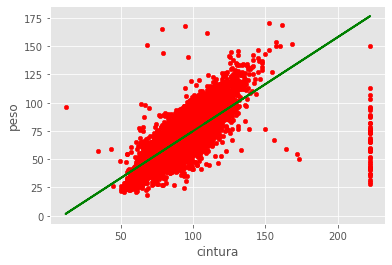

In [11]:
df.plot(kind='scatter',
       x = 'cintura',
       y = 'peso',
       color = 'r')

plt.plot(X,
        model_lm.predict(X),
        linewidth = 2,
        color = 'g')
plt.show()